# ICO projects from coinmarketcap - Huynh Duc Toan - coursera

An initial coin offering (ICO) is an event where a company sells a new cryptocurrency to raise money. Investors receive cryptocurrency in exchange for their financial contributions. In many ways, an ICO is the cryptocurrency version of an initial public offering (IPO) in the stock market.

There are milions of ICOs was created, only some project have enough credibility could show them off on coinmarketcap. Let's see how were their perfomances?

Data from [coinmarketcap](https://coinmarketcap.com/ico-calendar/ended/): 

Price data from coinmarketcap api, too

[Getting data process](https://github.com/tycoi2005/202308_machine_learning_ibm_coursera/blob/950d1af7d9682620ee2b8ae84c28a56c0f3c6900/003supervised-machine-learning-classification/w6.project.getcmc.ipynb) and [cleaning process](https://github.com/tycoi2005/202308_machine_learning_ibm_coursera/blob/2255c1017908695c5170adf1d9531a6b915be978/003supervised-machine-learning-classification/w6.project.cleaning.ipynb) could be view at my github


I'll build a model to explain what factor affect coin inactive (dead)

In [82]:
## Import packages here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance #, plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./pj_data/cleaned_data.csv')

# Data overview 

Cleaned data  look like this:

In [83]:
df.head()

,icoPriceUsd,currentStage,goalUsd,total_supply,price,exchangeName,n_contracts,isbnb,tags_reduce,iseth,issol,ismatic,isada,isavax,lifeday,dayscreated,is_active
0,0.08,1,98000.0,1.000000e+08,0.005751,10,1.0,1,6,0,0,0,0,0,656,656,1
1,0.03,1,80000.0,1.000000e+17,0.000000,10,2.0,0,10,1,1,0,0,0,311,311,0
2,0.60,1,1500000.0,1.000000e+08,0.055907,10,1.0,0,10,0,0,0,0,0,138,138,1
3,0.00,0,300000000.0,1.000000e+17,0.011018,3,1.0,0,10,0,0,0,0,0,4,4,1
4,0.95,1,500000.0,1.000000e+17,0.000000,3,1.0,0,10,1,0,0,0,0,70,70,0



|        FIELD | TYPES   | DESCRIPTION                                                                                                                                                                                                                                                                               |
|-------------:|---------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  icoPriceUsd | float64 | Ico price                                                                                                                                                                                                                                                                                 |
| currentStage | int64   | Current stage 0-6 {'ICO': 0, 'IDO': 1, 'IEO': 2, 'IFO': 3, 'Other': 4, 'Private Sale': 5, 'Seed Sale': 6}                                                                                                                                                                                 |
|      goalUsd | float64 | Goal of ico event in USD                                                                                                                                                                                                                                                                  |
| total_supply | float64 | Token total supply                                                                                                                                                                                                                                                                        |
|        price | float64 | Current price of token                                                                                                                                                                                                                                                                    |
| exchangeName | int64   | Place where project was ico {'BSCpad': 0, 'Binance': 1, 'Coinlist': 2, 'DAO maker': 3, 'DuckStarter': 4, 'Enjinstarter': 5, 'GameFi': 6, 'Gate.io': 7, 'Ignition (Paid Network)': 8, 'Kommunitas': 9, 'Other': 10, 'Polkastarter': 11, 'Poolz': 12, 'Trustpad': 13}                       |
|  n_contracts | float64 | How many blockchain that project was deployed                                                                                                                                                                                                                                             |
|        isbnb | int64   | Is project on binance smart chain?                                                                                                                                                                                                                                                        |
|  tags_reduce | int64   | Project categories {'ai-big-data': 0, 'bnb-chain': 1, 'bullperks-launchpad': 2, 'collectibles-nfts': 3, 'dao-maker': 4, 'defi': 5, 'gaming': 6, 'genpad': 7, 'metaverse': 8, 'okex-blockdream-ventures-portfolio': 9, 'other': 10, 'polygon-ecosystem': 11, 'vbc-ventures-portfolio': 12} |
|        iseth | int64   | Is project on ethereum?                                                                                                                                                                                                                                                                   |
|        issol | int64   | Is project on solana?                                                                                                                                                                                                                                                                     |
|      ismatic | int64   | Is project on polygon?                                                                                                                                                                                                                                                                    |
|        isada | int64   | Is project on cardano?                                                                                                                                                                                                                                                                    |
|       isavax | int64   | Is project on avalanche?                                                                                                                                                                                                                                                                  |
| lifeday      | int64   | How many days token was lived (from created to last_updated)                                                                                                                                                                                                                              |
| dayscreated  | int64   | How many days token was created (from created to the day data was collected)          

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
icoPriceUsd,1220.0,5.891680e+00,1.861119e+02,0.0,1.000000e-02,4.000000e-02,1.500000e-01,6.500000e+03
currentStage,1220.0,1.348361e+00,1.145289e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
goalUsd,1220.0,5.311083e+07,1.133864e+08,0.0,1.000000e+05,2.000000e+05,2.055000e+06,3.000000e+08
total_supply,1220.0,2.233385e+16,4.163714e+16,100000.0,1.200000e+08,1.000000e+09,6.428501e+10,1.000000e+17
price,1220.0,7.188388e+00,1.961358e+02,0.0,1.267517e-04,1.839954e-03,1.582388e-02,6.615486e+03
exchangeName,1220.0,8.909016e+00,2.816933e+00,0.0,1.000000e+01,1.000000e+01,1.000000e+01,1.300000e+01
n_contracts,1220.0,1.524590e+00,1.010309e+00,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
isbnb,1220.0,6.319672e-01,4.824681e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tags_reduce,1220.0,7.939344e+00,2.963479e+00,0.0,6.000000e+00,1.000000e+01,1.000000e+01,1.200000e+01
iseth,1220.0,3.688525e-01,4.826917e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


## is_active : 40% ico coin on cmc was died, with average lifedays 600

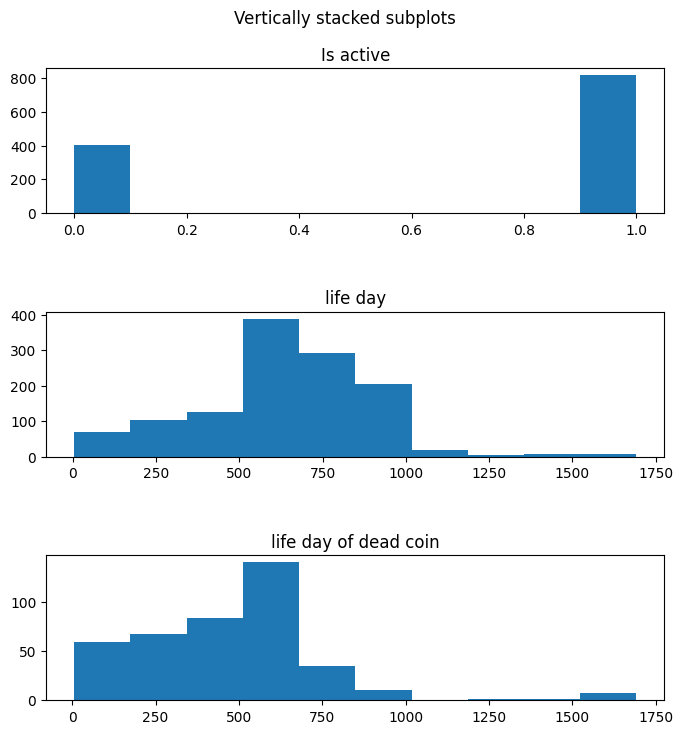

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 8))
fig.tight_layout(pad=5.0)
fig.suptitle('Vertically stacked subplots')
ax1.hist(df.is_active, label="is_active")
ax2.hist(df.lifeday)

df_inactive = df[df['is_active']==0]
ax3.hist(df_inactive.lifeday)

ax1.title.set_text('Is active')
ax2.title.set_text('life day')
ax3.title.set_text('life day of dead coin')

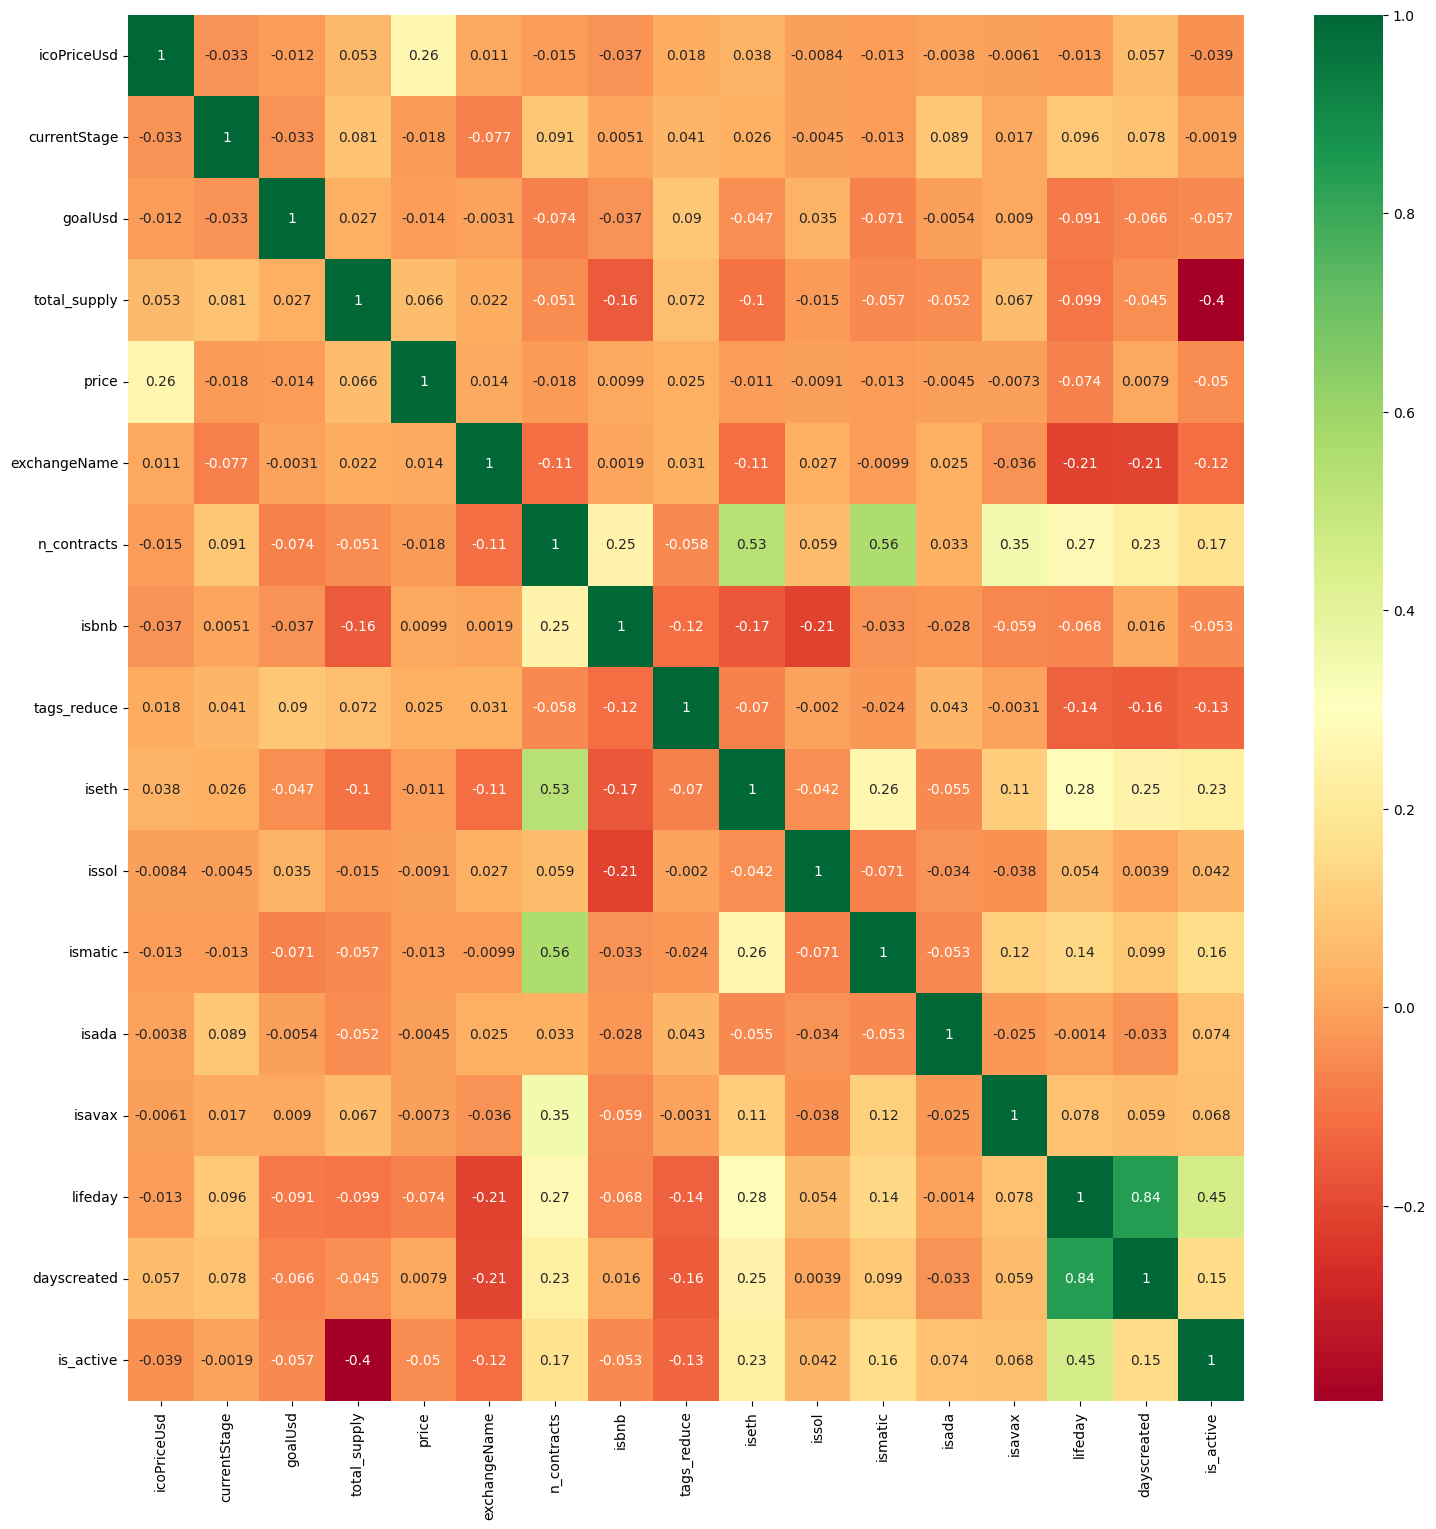

In [86]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

# Plan

I'll train several model for classifying on is_active field
Finding the main features which affects living time of a coin

In [87]:
# remove lifeday () and current price because affect by active status
df=df.drop(['lifeday'],axis=1)
df=df.drop(['price'],axis=1)


rs=42

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

# Extract and sort feature coefficients
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], X_test.columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=list(feature_names),  
                       filled=True)
    plt.show()

In [88]:
# Split the training and testing dataset
X = df.loc[ : , df.columns != 'is_active']
y = df['is_active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = rs)


# LogisticRegression Model

In [89]:
# Build a simple logistic regression model
min_max_scaler = StandardScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_train_minmax = min_max_scaler.fit_transform(X_train)

model = LogisticRegression(random_state=rs, penalty='l1', solver='liblinear',
                              max_iter = 1000)
# Train the model
model.fit(X_train_minmax, y_train)
preds = model.predict(X_test_minmax)

evaluate_metrics(y_test, preds)

{'accuracy': 0.73224043715847,
 'recall': 0.9183673469387755,
 'precision': 0.7425742574257426,
 'f1score': 0.8211678832116788}

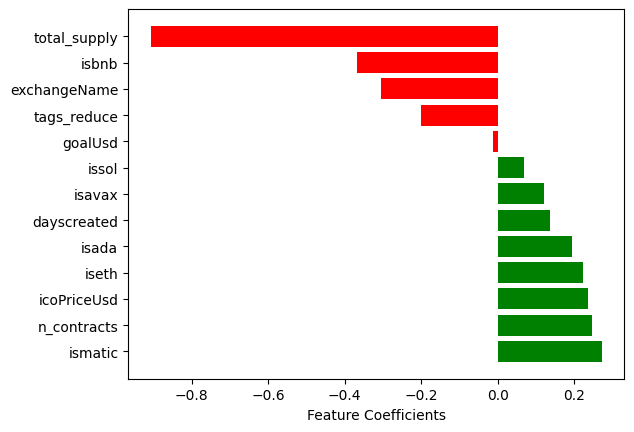

In [90]:
coef_dict = get_feature_coefs(model)
visualize_coefs(coef_dict)

# Decision Trees Model

In [91]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=rs)
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [92]:
best_params

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}

In [93]:
preds = grid_search.predict(X_test)

evaluate_metrics(y_test, preds)

{'accuracy': 0.8114754098360656,
 'recall': 0.9061224489795918,
 'precision': 0.8283582089552238,
 'f1score': 0.8654970760233918}

Let's read the model to understand important features:

In [94]:
tree_exp = export_text(grid_search.best_estimator_, feature_names=list(X_train.columns))
print(tree_exp)

|--- total_supply <= 82142502912.00
|   |--- dayscreated <= 665.50
|   |   |--- isbnb <= 0.50
|   |   |   |--- dayscreated <= 441.00
|   |   |   |   |--- class: 1
|   |   |   |--- dayscreated >  441.00
|   |   |   |   |--- dayscreated <= 543.50
|   |   |   |   |   |--- icoPriceUsd <= 0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- icoPriceUsd >  0.02
|   |   |   |   |   |   |--- currentStage <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- currentStage >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- dayscreated >  543.50
|   |   |   |   |   |--- icoPriceUsd <= 0.04
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- icoPriceUsd >  0.04
|   |   |   |   |   |   |--- icoPriceUsd <= 0.05
|   |   |   |   |   |   |   |--- ismatic <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- ismatic >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- icoP

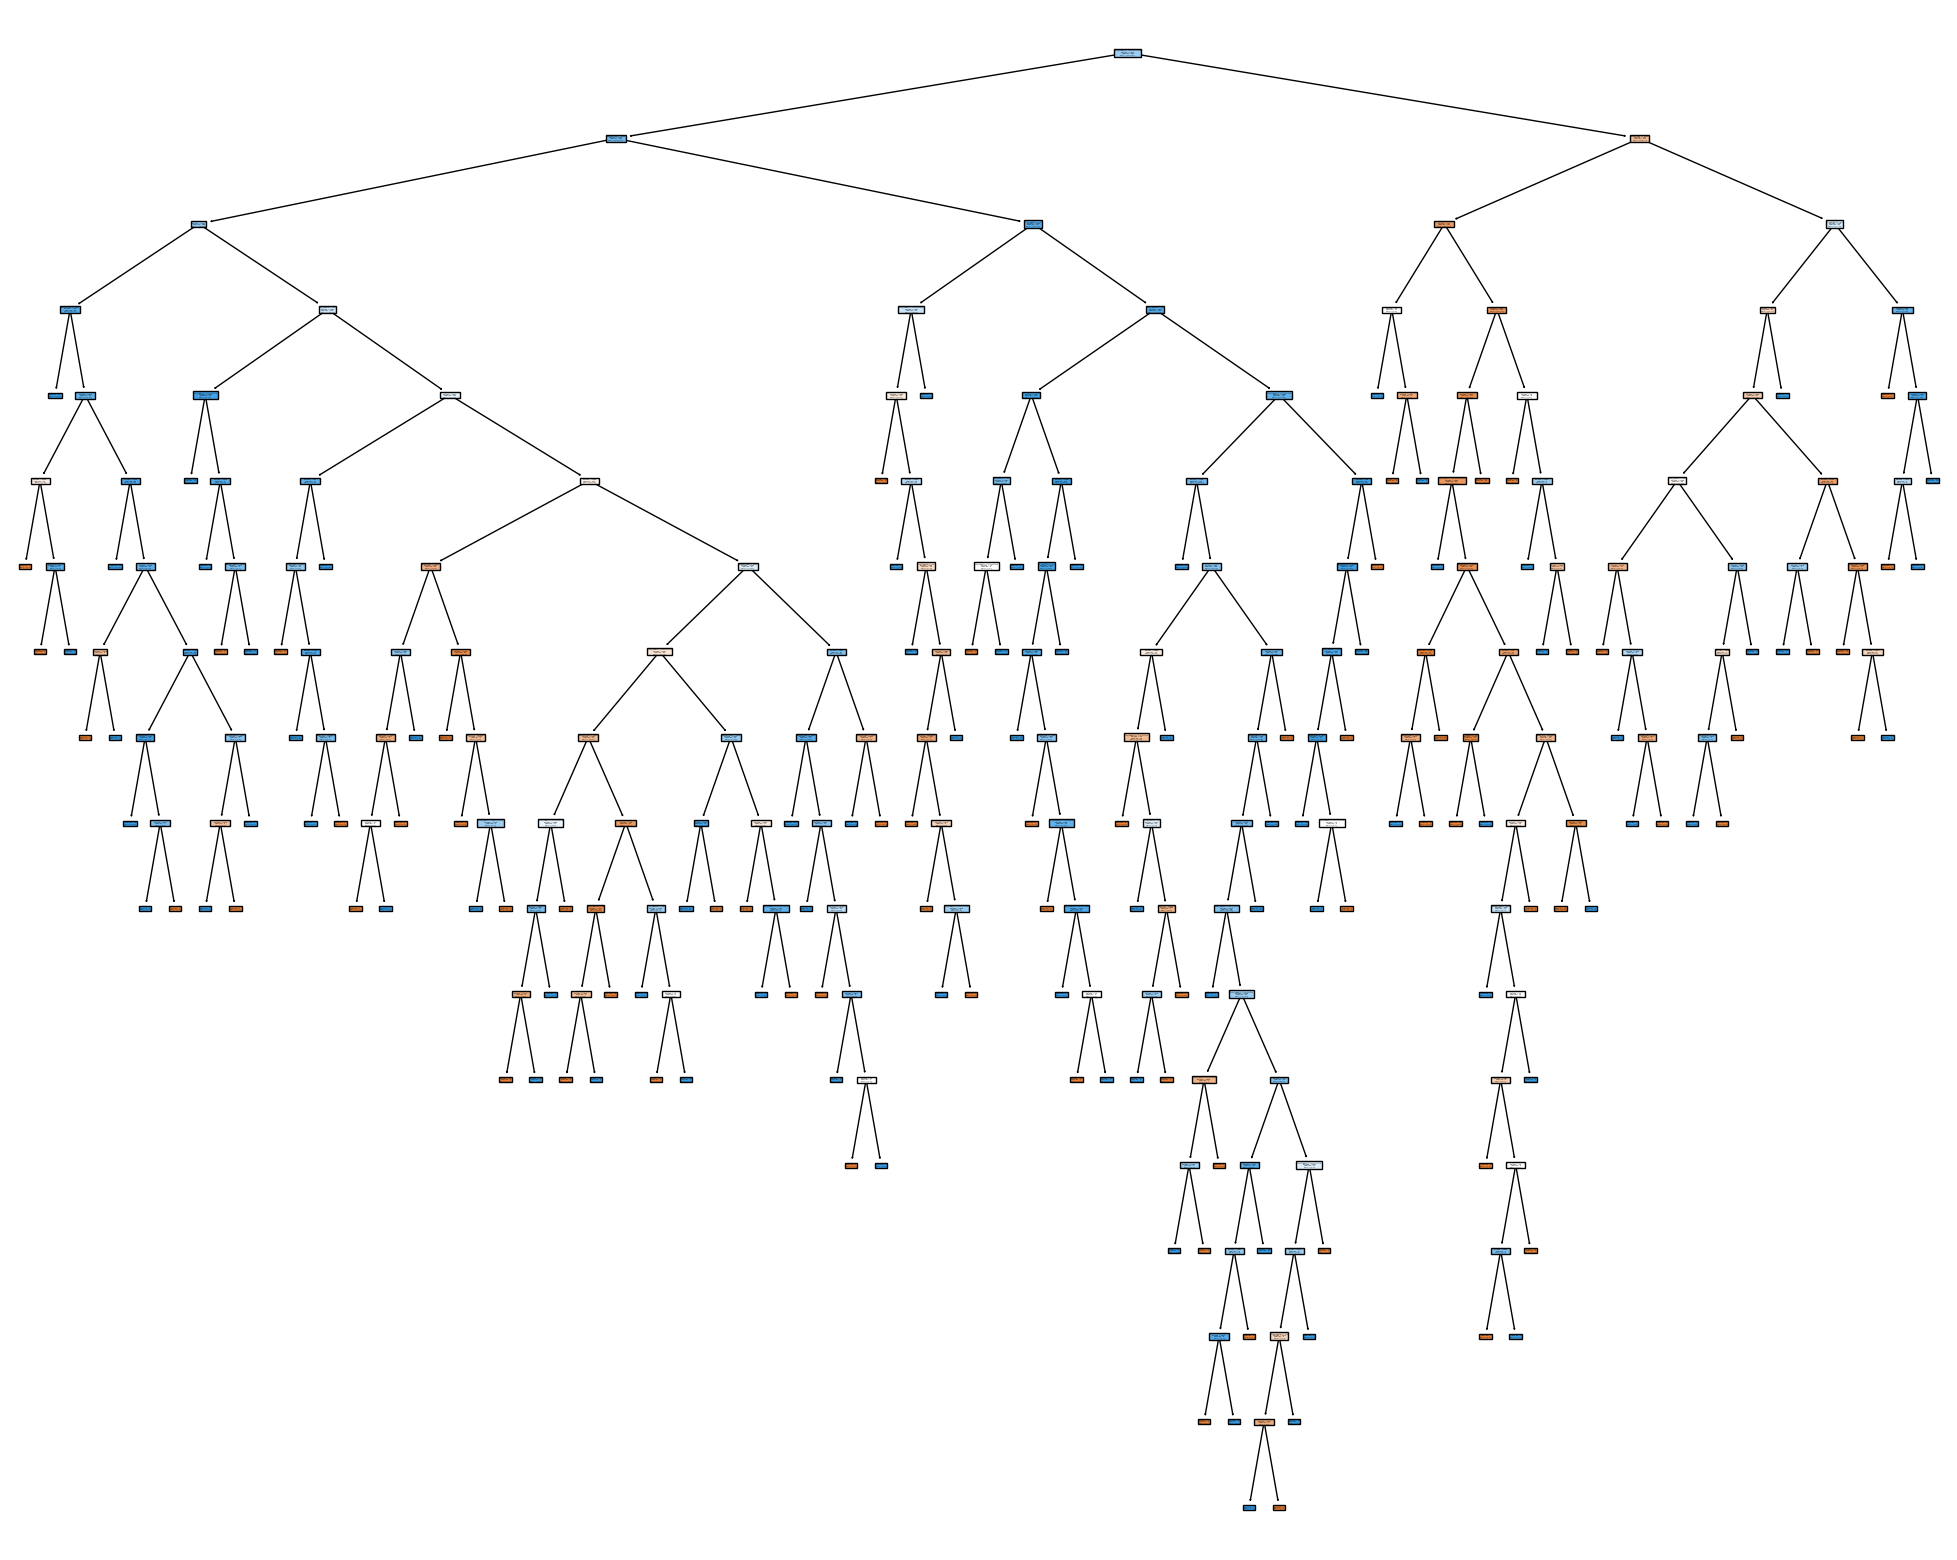

In [95]:
feature_names = df.columns.values
plot_decision_tree(grid_search.best_estimator_, feature_names=feature_names)

# Support Vector Machine Model

In [96]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
model = SVC()

# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [97]:
preds = grid_search.predict(X_test)

evaluate_metrics(y_test, preds)

{'accuracy': 0.7349726775956285,
 'recall': 0.889795918367347,
 'precision': 0.7569444444444444,
 'f1score': 0.8180112570356473}

# Summary from learning models:

The best model was DecisionTree with hyperparameter {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}

These models show some insights of data, relationship of key features with token live and death:

- Top alive coin are on these blockchain: matic, eth, ada, avax, solana. Coin on bnb chain is more likely to die than others
- Coin on many blockchains have high probability to live than coin on 1 blockchain
- Coin with high ico price have high probability to live than low ico price
- Coin with high total supply have low probability to live 
- Coin on less common exchange tend to die
- Goal is not much important 


# Future plans:

The data still have somethings need to improved: 
- Exchange should be ranked 
- Category should be more specified data

There are many infos from a project could affect its active status. For examples team size, white paper, public sale percentage, personal cap... There infos should be collected and put in dataframe too.

